In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle
import seaborn as sns
%matplotlib inline


In [41]:
df = pd.read_csv('C:\\Users\\prade\\OneDrive\\Documents\\1.Term3\AML_3014_Neural_Networks\\Algerian_forest_fires_cleaned.csv')

In [42]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [43]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [44]:
prev_shape = df.shape
#dropping the null values
df.dropna()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [45]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [52]:
unique_classes = df['Classes'].unique()
print(unique_classes)
# Converting 'Classes' column to strings
df['Classes'] = df['Classes'].astype(str)
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

column_names = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI','FWI' 'BUI', 'Classes', 'Region']

[0 1]


In [47]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [48]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734


<AxesSubplot: >

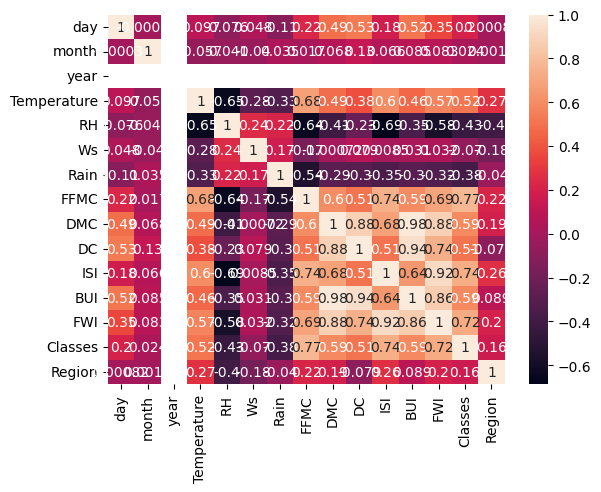

In [49]:
sns.heatmap(df.corr(), annot= True)

In [69]:
X = df.iloc[:, :-1]
y= df.iloc[:, -1]
print("X shape:", X.shape)
print("y shape:", y.shape) 

X shape: (243, 14)
y shape: (243,)


In [58]:
X_train, y_train, X_test, Y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [59]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

In [62]:
# X_train_sc= scaler.fit_transform(X_train)
# X_test_sc= scaler.transform(X_test)


In [57]:
# Step 2: Model Training
# a. and b. Create and fit the model
X_train = train_data[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'Classes', 'Region']]
y_train = train_data[['FWI']]
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [71]:
# Step 3: Model Evaluation
X_test = test_data[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'Classes', 'Region']]
y_test = test_data['FWI']
y_pred = lr_model.predict(X_test)


In [72]:
# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, MAE: {mae}, R-squared: {r2}')

MSE: 0.3323111538486347, MAE: 0.4267520614689839, R-squared: 0.9890356825759858


In [79]:
score = r2_score(y_test, y_pred)
r2_adjusted = 1-((1-score)*(len(y)-1))/(len(y)-X.shape[1]-1)
print(score)
print(r2_adjusted)

0.9890356825759858
0.9883624350148622


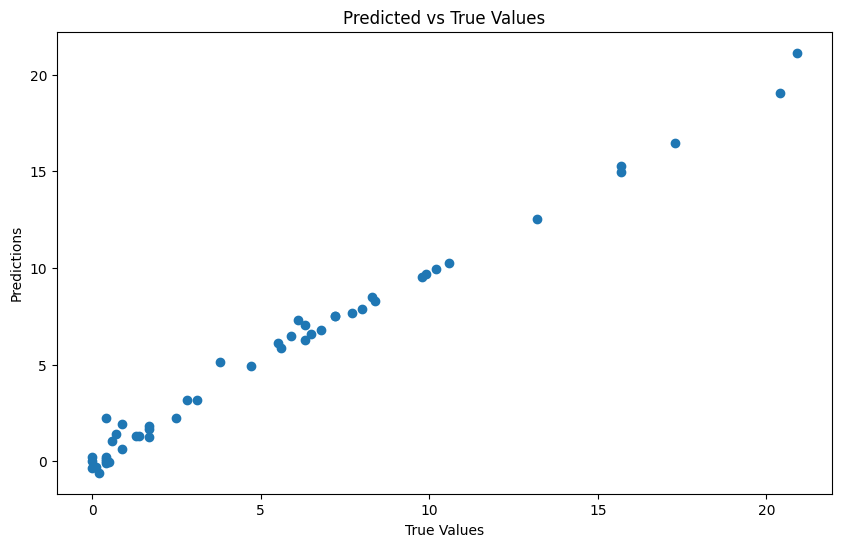

In [95]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs True Values')
plt.show()

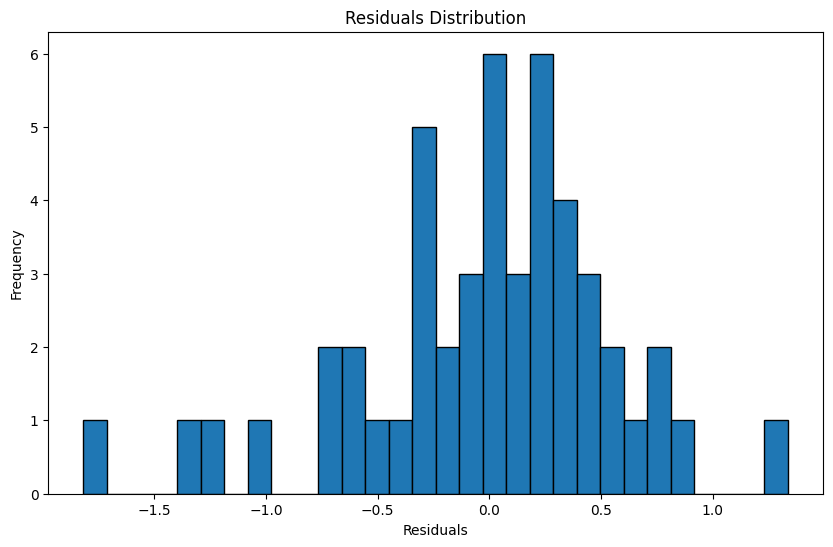

In [98]:
# Calculate residuals
residuals = y_test.ravel() - y_pred.ravel()

# Create a histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
# plt.grid(True)
plt.show()







In [84]:
# Step 4: Pickling the Model
# with open('lr_model.pkl', 'wb') as file:
#     pickle.dump(lr_model, file)

# # Step 5: Prediction on Unseen Data
# # Load the model
# with open('lr_model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)
pickle.dump(lr_model, open("multiple_regressor.pkl", 'wb'))

In [86]:
model_regressor = pickle.load(open("multiple_regressor.pkl", 'rb'))




- Cleaned up the data by removing missing values.
- Converted the 'fire' and 'not fire' labels to 1s and 0s.
- Checked how different factors like temperature and humidity relate to fire risk.
- Trained a model to predict fire risk based on these factors.
- Checked how well the model did by comparing its predictions to actual fire risk.

Strengths:
- Made the data easier to work with by changing labels to numbers.
- Used metrics to measure how well the model predicts fire risk.
- Created visual plots to see the model's performance.

Limitations:
- Didn't handle missing data in the best way.
- Didn't explain which factors are most important for predicting fires.
- Used default settings for the model without fine-tuning.
- Made a mistake when splitting the data for testing.

Suggestions for Improvement:
- Handle missing data better and scale features.
- Figure out which factors are the most important.
- Try different settings for the model to make it work better.
- Double-check data splitting.
- Explore more advanced modeling techniques for better predictions.

